# Homework 7

*Alexandra Beikert, Pascal Huber, León-Alexander Hühn*

*1. What are the fixed points for the system if equations given above?*

The fixed points are given by  
$$ a_i - \sum_j b_{ij}P_j = 0$$
and  
$$\sum_j c_{ij}N_j - d_i = 0$$  
The solution is easily guessed to be 
$$N_i = 1 \forall i$$
$$P_i = 1 \forall i$$

*2. What is the Jacobi matrix A at the non-trivial fixed point?*

Defining the function $f_i$ as being the first for the first 3 $i$ and the second for the rest of the $i$ and defining the variables $x_i$ in the same way leads to the matrix
$$
\left(\begin{array}{cc} 
0 & 0 & 0 & -20 & -30 & -5\\
0 & 0 & 0 & -1 & -3 & -7\\
0 & 0 & 0 &-4 & -10 & -20\\
20 & 30 & 35 & 0 & 0 & 0\\
3 & 3 & 3 & 0 & 0 & 0\\
7 & 8 & 20 & 0 & 0 & 0
\end{array}\right)
$$ 

*3. Determine the eigenvalues and eigenvectors $\lambda_i$ and $v_i$, $i=1,...,6$ of A with Mathematica or any other helpful program you may have.  
Choose an initial state **n**$=\sum_{i=1}^6c_iv_i$ with $c_1=c_2=3,c_3=c_4=1,c_5=5,c_6=0.1$.  
Plot and discuss the time dependent evolution of the six populations (given by this linear model). Is it stable or unstabel?*

To calculate the time evolution, the approximation  
$$ n = \sum_{i=1}^6 c_i exp(\lambda_i t)v_i$$
is used. The eigenvalues $\lambda_i$ and the eigenvectors $v_i$ were calculated of A using WolframAlpha.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/leon-alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part


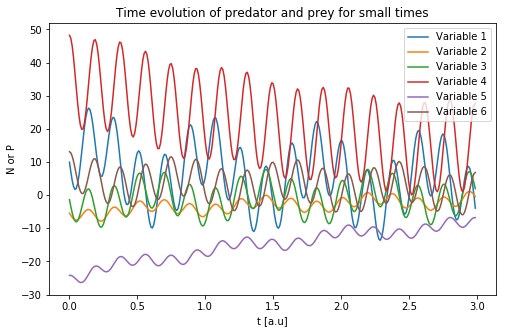

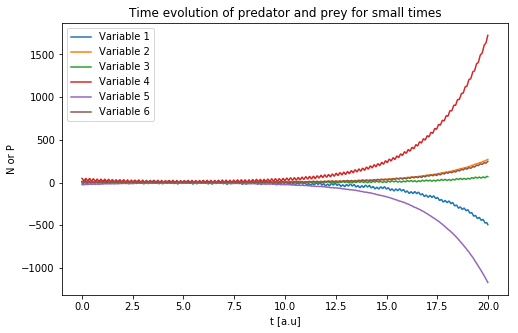

In [78]:
c = np.array([3,3,1,1,5,0.1])
lambda_ = np.array([33.63j,-33.63j,7.7j,-7.7j,-0.39,0.39])
v = np.array([[1.75j,0.3j,0.95j,2.3,0.27,1],[-1.75j,-0.3j,-0.95j,2.3,0.27,1],
              [-3.61j,0.57j,1.42j,-0.69,-0.63,1],[3.61j,-0.57j,-1.42j,-0.69,-0.63,1],
              [2.03,-1.11,-0.28,7.02,-4.82,1],[-2.03,1.11,0.28,7.02,-4.82,1]])
def get_time_evu(t):
    n = np.zeros(6)
    for i in range(0,6):
        n = n+(c[i]*np.exp(lambda_[i] * t)*v[i])
    return n
def main_program(time,timestep):
    t = np.arange(0,time,timestep)
    values = np.zeros(shape=(len(t),6))
    plt.figure(figsize=(8,5))
    plt.title("Time evolution of predator and prey for small times")
    plt.xlabel("t [a.u]")
    plt.ylabel("N or P")
    for i in range(len(t)):
        values[i] = get_time_evu(t[i])
    for i in range(0,6):
        plt.plot(t, values[:,i].real, label="Variable "+str(i+1))
    plt.legend()
    plt.show()
main_program(3,0.01)
main_program(20,0.01)

One can clearly see that the solution is not stable for larger times. The values for small times are negative, which should not happen, but the general trend of the solution is clear.